In [ ]:
import autograd.numpy as np
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 2
%matplotlib inline  

from objectives import SaddleBench
from algorithms import RS, STP, BDS, AHDS, RSPI_SPSA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from collections import OrderedDict

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

# Function with growing dimension

$f(x_1,...,x_d, y) = \frac{1}{4}\sum\limits_{i=1}^{d}x_i^4 - y\sum\limits_{i=1}^dx_i + \frac{d}{2}y^2$

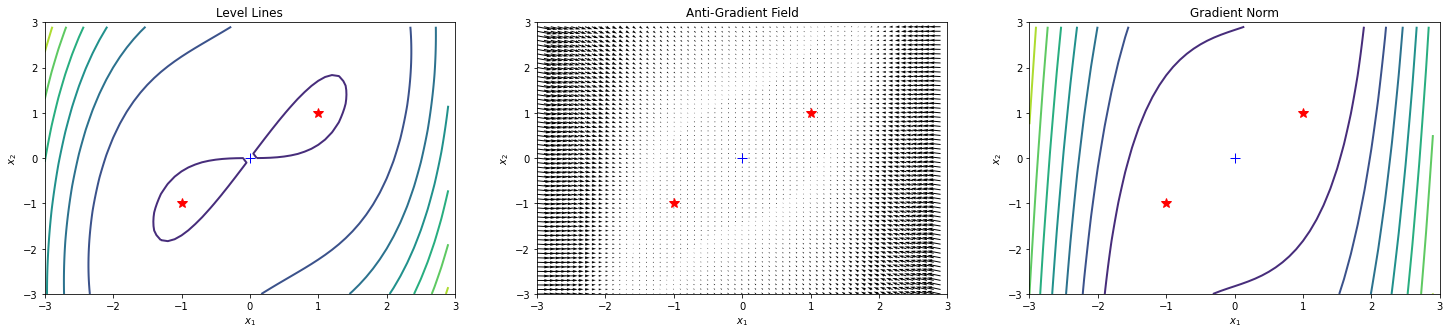

In [ ]:
f = SaddleBench()

# Visualization 
f.visualize(xmin=-3.0, xmax=3.0, ymin=-3.0, ymax=3.0, delta_x=0.1, delta_y=0.1)

In [ ]:
T = 2000
D = [5, 20, 100, 200]

# Parameters 
T_half = [10, 15, 15, 15]
RSPI_step = [1.8, 1.75, 1.0, 1.75]
RSPI_theta = [0.6, 0.78, 0.95, 0.96]
RSPI_upd = ['half', 'half', 'half', 'half']

AHDS_step = [0.8, 0.8, 5.0, 5.0]
AHDS_max  = [10.0, 10.0, 20.0, 20.0]

# Number of repetitions 
N_rep = 10

fval = []
gnorm = []
xaxis = []

for i, d in enumerate(D): 

  # Define objective function 
  f = SaddleBench(d)

  fval.append({})
  gnorm.append({})
  xaxis.append({})

  for n in range(N_rep): 
    # Starting point 
    x = f.saddle[0]

    """=================== STP ==================="""
    # Run the optimizer  
    stp_summary = STP(f, x, a_init=2.5, step_upd='half', distribution='Normal', T=T)

    if n == 0: 
      fval[i]['STP'] = []
      gnorm[i]['STP'] = []
      xaxis[i]['STP'] = []

    fval[i]['STP'].append(stp_summary['fval'][:,1])
    gnorm[i]['STP'].append(stp_summary['gnorm'][:,1])
    xaxis[i]['STP'].append(stp_summary['fval'][:,0]*stp_summary['time'])

    """=================== Random Search ==================="""
    # Run the optimizer  
    rs_summary = RS(f, x, a_init=RSPI_step[i], sigma_1=0.35, sigma_2=0.65, \
                     distribution='Uniform', step_upd=RSPI_upd[i], \
                     theta=RSPI_theta[i], T_half=T_half[i], T=T)
    
    if n == 0: 
      fval[i]['RS'] = []
      gnorm[i]['RS'] = []
      xaxis[i]['RS'] = []

    fval[i]['RS'].append(rs_summary['fval'][:,1])
    gnorm[i]['RS'].append(rs_summary['gnorm'][:,1])
    xaxis[i]['RS'].append(rs_summary['fval'][:,0]*rs_summary['time'])
  
    """=================== BDS Rotation Matrix ==================="""
    # Forcing function 
    rho = lambda z, p=2, c=0.0: c*z**p

    # Run the optimizer  
    bds_summary = BDS(f, x, a_init=AHDS_step[i], a_max=AHDS_max[i], theta=0.5, gamma=1.25, \
                      rho=rho, T=T)
            
    if n == 0: 
      fval[i]['BDS'] = []
      gnorm[i]['BDS'] = []
      xaxis[i]['BDS'] = []

    fval[i]['BDS'].append(bds_summary['fval'][:,1])
    gnorm[i]['BDS'].append(bds_summary['gnorm'][:,1])
    xaxis[i]['BDS'].append(bds_summary['fval'][:,0]*bds_summary['time'])

    """=================== AHDS ==================="""
    # Forcing function 
    rho = lambda z, p=2, c=0.0: c*z**p

    # Run the optimizer  
    ahds_unif_summary = AHDS(f, x, a_init=AHDS_step[i], a_max=AHDS_max[i], theta=0.5, \
                             gamma=1.25, rho=rho, T=T)
    
    if n == 0: 
      fval[i]['AHDS'] = []
      gnorm[i]['AHDS'] = []
      xaxis[i]['AHDS'] = []

    fval[i]['AHDS'].append(ahds_unif_summary['fval'][:,1])
    gnorm[i]['AHDS'].append(ahds_unif_summary['gnorm'][:,1])
    xaxis[i]['AHDS'].append(ahds_unif_summary['fval'][:,0]*ahds_unif_summary['time'])

    """=================== Random Search Power Iteration ==================="""
    # Run the optimizer 
    rspi_summary = RSPI_SPSA(f, x, a_init=RSPI_step[i], c_init=0.15, beta=0.25, sigma_1=0.35, \
                        sigma_2=0.65, distribution='Uniform', step_upd=RSPI_upd[i], \
                        theta=RSPI_theta[i], T_half=T_half[i], T_power=20, T=T)   
    
    if n == 0: 
      fval[i]['RSPI'] = []
      gnorm[i]['RSPI'] = []
      xaxis[i]['RSPI'] = []

    fval[i]['RSPI'].append(rspi_summary['fval'][:,1])
    gnorm[i]['RSPI'].append(rspi_summary['gnorm'][:,1])
    xaxis[i]['RSPI'].append(rspi_summary['fval'][:,0]*rspi_summary['time'])

  for method in fval[i].keys(): 
    fval[i][method] = np.array(fval[i][method])
  
  for method in gnorm[i].keys(): 
    gnorm[i][method] = np.array(gnorm[i][method])

  for method in xaxis[i].keys(): 
    xaxis[i][method] = np.array(xaxis[i][method])

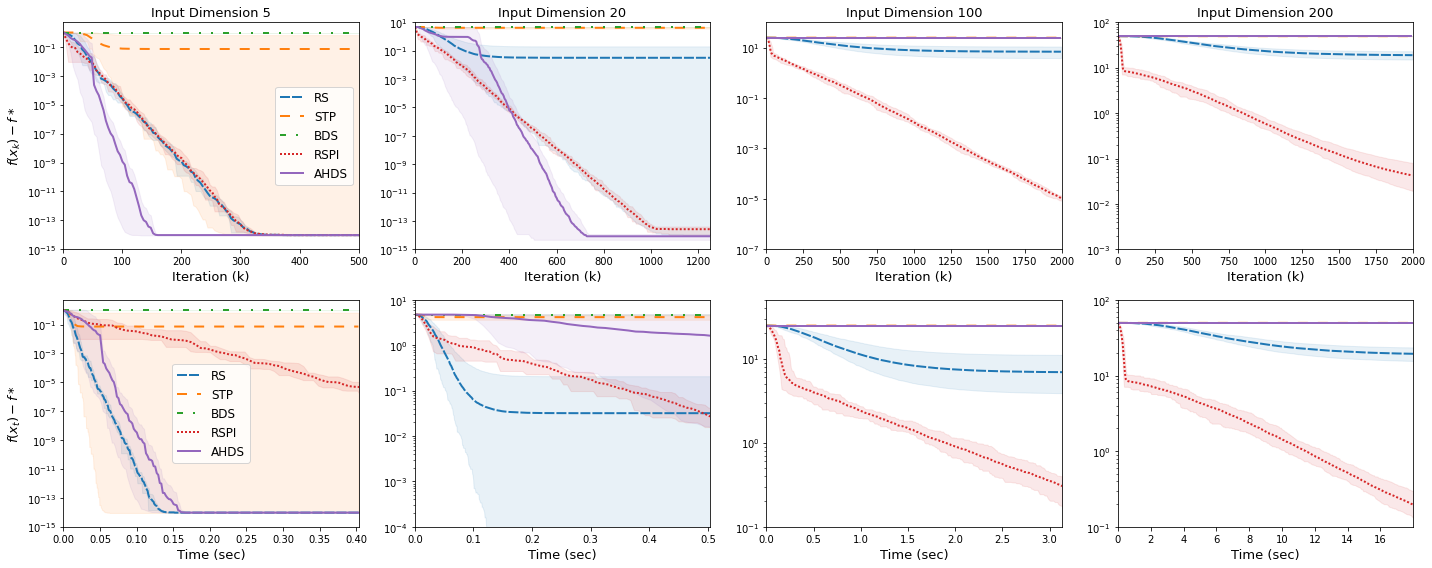

In [ ]:
fig, axs = plt.subplots(2, len(D), figsize=(20,8))

T_plot = [500, 1250, 2000, 2000]
y_lim_fval_iter = [(10e-16, 10e0/2), (10e-16, 10e0), (10e-8, 10e1), (10e-4, 10e1)]
y_lim_fval_time = [(10e-16, 10e0/2), (10e-5, 10e0), (10e-2, 10e1/2), (10e-2, 10e1)]


plt_colours = {}

lstyles = ['densely dashed', 'dashed', 'dashdotdotted', 'densely dotted', 'solid']
methods = ['RS', 'STP', 'BDS', 'RSPI', 'AHDS']

for i, d in enumerate(D): 

  f = SaddleBench(d)
  x_axis = np.arange(T)

  # Optimality gap - Iteration 
  for lstyle, method in zip(lstyles, methods): 
    m = np.mean(fval[i][method], axis=0) - f.fglob + 10e-15
    s_min = np.min(fval[i][method], axis=0) - f.fglob + 10e-15
    s_max = np.max(fval[i][method], axis=0) - f.fglob + 10e-15
    axs[0, i].plot(x_axis[::4], m[::4], label=method, linestyle=linestyles[lstyle])
    axs[0, i].fill_between(x_axis[::4], s_min[::4], s_max[::4], alpha=0.1, 
                        color=axs[0, i].get_lines()[-1].get_color())
    # Save colour 
    plt_colours[method] = axs[0, i].get_lines()[-1].get_color()
    
    axs[0, i].set_yscale('log')
    axs[0, i].set_xlim(0, T_plot[i])
    axs[0, i].set_ylim(y_lim_fval_iter[i][0], y_lim_fval_iter[i][1])
    axs[0, i].set_title('Input Dimension %i' %d, fontsize=13)
    if i == 0: 
      axs[0, i].legend(fontsize='large')
      axs[0, i].set_ylabel(r'$f(x_k) - f*$', fontsize=13)
    axs[0, i].set_xlabel('Iteration (k)', fontsize=13)

  t_lim = []
  for method in methods: 
    t_lim.append(np.mean(xaxis[i][method], axis=0)[-1])
  t_lim = np.min(t_lim)

  # Optimality gap - Time
  for lstyle, method in zip(lstyles, methods): 
    t_m = np.mean(xaxis[i][method], axis=0)
    y_m = np.mean(fval[i][method], axis=0) - f.fglob + 10e-15
    y_min = np.min(fval[i][method], axis=0) - f.fglob + 10e-15
    y_max = np.max(fval[i][method], axis=0) - f.fglob + 10e-15
    axs[1, i].plot(t_m[::2], y_m[::2], label=method, linestyle=linestyles[lstyle])
    axs[1, i].fill_between(t_m[::2], y_min[::2], y_max[::2], alpha=0.1, 
                        color=axs[1, i].get_lines()[-1].get_color())
    
    axs[1, i].set_yscale('log')
    axs[1, i].set_xlim((0, t_lim))
    axs[1, i].set_ylim(y_lim_fval_time[i][0], y_lim_fval_time[i][1])
    if i == 0: 
      axs[1, i].legend(fontsize='large')
      axs[1, i].set_ylabel(r'$f(x_t) - f*$', fontsize=13)
    axs[1, i].set_xlabel('Time (sec)', fontsize=13)

fig.tight_layout()

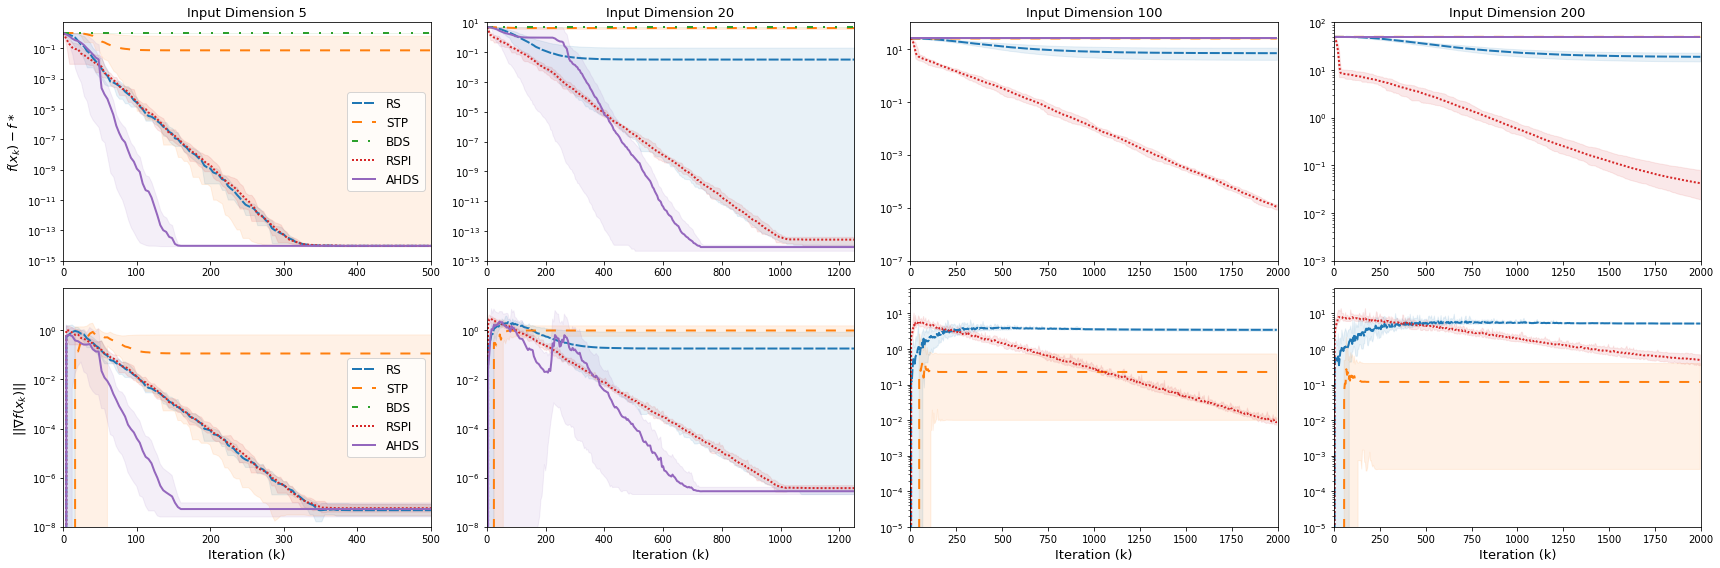

In [ ]:
T = 2000
D = [5, 20, 100, 200]

fig, axs = plt.subplots(2, len(D), figsize=(24,8))

T_plot = [500, 1250, 2000, 2000]
y_lim_fval = [(10e-16, 10e0/2), (10e-16, 10e0),(10e-8, 10e1), (10e-4, 10e1)]
y_lim_gnorm = [(10e-9, 10e1/2), (10e-9, 10e1/2), (10e-6, 10e1/2), (10e-6, 10e1/2)]

plt_colours = {}

lstyles = ['densely dashed', 'dashed', 'dashdotdotted', 'densely dotted', 'solid']
methods = ['RS', 'STP', 'BDS', 'RSPI', 'AHDS']

for i, d in enumerate(D): 

  f = SaddleBench(d)
  x_axis = np.arange(T)

  # Log-optimality gap 
  for lstyle, method in zip(lstyles, methods): 
    m = np.mean(fval[i][method], axis=0) - f.fglob + 10e-15
    s_min = np.min(fval[i][method], axis=0) - f.fglob + 10e-15
    s_max = np.max(fval[i][method], axis=0) - f.fglob + 10e-15 
    axs[0, i].plot(x_axis[::4], m[::4], label=method, linestyle=linestyles[lstyle])
    axs[0, i].fill_between(x_axis[::4], s_min[::4], s_max[::4], alpha=0.1, 
                        color=axs[0, i].get_lines()[-1].get_color())
    # Save colour 
    plt_colours[method] = axs[0, i].get_lines()[-1].get_color()
    axs[0, i].set_yscale('log')
    axs[0, i].set_xlim(0, T_plot[i])
    axs[0, i].set_ylim(y_lim_fval[i][0], y_lim_fval[i][1])
    axs[0, i].set_title('Input Dimension %i' %d, fontsize=13)
    if i == 0:
      axs[0, i].legend(fontsize='large')
      axs[0, i].set_ylabel(r'$f(x_k) - f*$', fontsize=13)

  # Gradient norm 
  for lstyle, method in zip(lstyles, methods): 
    m = np.mean(gnorm[i][method], axis=0) 
    s_min = np.min(gnorm[i][method], axis=0)
    s_max = np.max(gnorm[i][method], axis=0) 
    axs[1, i].plot(x_axis[::4], m[::4], label=method, linestyle=linestyles[lstyle])
    axs[1, i].fill_between(x_axis[::4], s_min[::4], s_max[::4], alpha=0.1, 
                        color=axs[1, i].get_lines()[-1].get_color())
    
    axs[1, i].set_yscale('log')
    axs[1, i].set_xlim(0, T_plot[i])
    axs[1, i].set_ylim(y_lim_gnorm[i][0], y_lim_gnorm[i][1])
    if i == 0: 
      axs[1, i].legend(fontsize='large')
      axs[1, i].set_ylabel(r'$||\nabla f(x_k)||$', fontsize=13)
    axs[1, i].set_xlabel('Iteration (k)', fontsize=13)

fig.tight_layout()

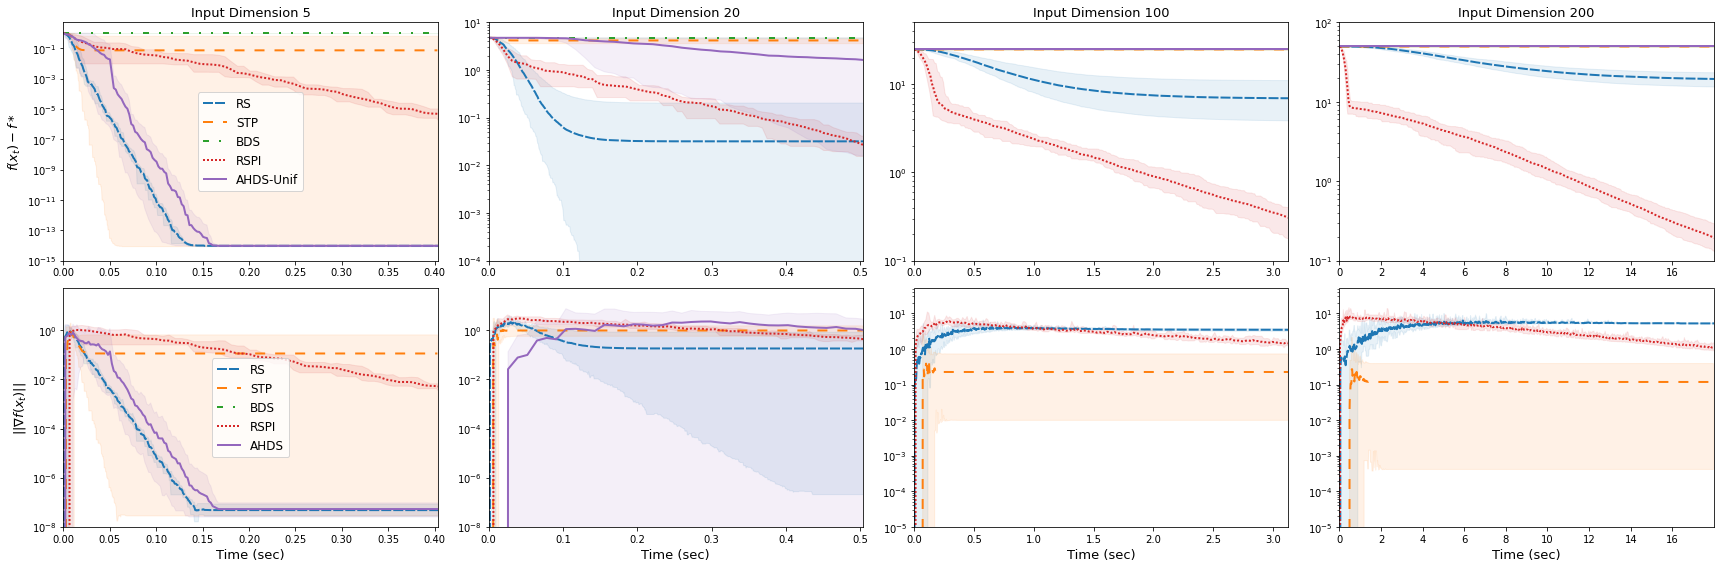

In [ ]:
D = [5, 20, 100, 200]

fig, axs = plt.subplots(2, len(D), figsize=(24,8))

y_lim_fval = [(10e-16, 10e0/2), (10e-5, 10e0), (10e-2, 10e1/2), (10e-2, 10e1)]
y_lim_gnorm = [(10e-9, 10e1/2), (10e-9, 10e1/2), (10e-6, 10e1/2), (10e-6, 10e1/2)]

lstyles = ['densely dashed', 'dashed', 'dashdotdotted', 'densely dotted', 'solid']
methods = ['RS', 'STP', 'BDS', 'RSPI', 'AHDS']

for i, d in enumerate(D): 

  # Objective
  f = SaddleBench(d)

  t_lim = []
  for method in methods: 
    t_lim.append(np.mean(xaxis[i][method], axis=0)[-1])
  t_lim = np.min(t_lim)

  # Log-optimality gap 
  for lstyle, method in zip(lstyles, methods): 
    t_m = np.mean(xaxis[i][method], axis=0)
    y_m = np.mean(fval[i][method], axis=0) - f.fglob + 10e-15
    y_min = np.min(fval[i][method], axis=0) - f.fglob + 10e-15
    y_max = np.max(fval[i][method], axis=0) - f.fglob + 10e-15
    axs[0, i].plot(t_m[::2], y_m[::2], label=method, linestyle=linestyles[lstyle])
    axs[0, i].fill_between(t_m[::2], y_min[::2], y_max[::2], alpha=0.1, 
                        color=axs[0, i].get_lines()[-1].get_color())
    
    axs[0, i].set_yscale('log')
    axs[0, i].set_xlim((0, t_lim))
    axs[0, i].set_ylim(y_lim_fval[i][0], y_lim_fval[i][1])
    axs[0, i].set_title('Input Dimension %i' %d, fontsize=13)
    if i == 0: 
      axs[0, i].legend(fontsize='large')
      axs[0, i].set_ylabel(r'$f(x_t) - f*$', fontsize=13)

  # Gradient norm 
  for lstyle, method in zip(lstyles, methods): 
    t_m = np.mean(xaxis[i][method], axis=0)
    y_m = np.mean(gnorm[i][method], axis=0)  
    y_min = np.min(gnorm[i][method], axis=0) 
    y_max = np.max(gnorm[i][method], axis=0)
    axs[1, i].plot(t_m[::2], y_m[::2], label=method, linestyle=linestyles[lstyle])
    axs[1, i].fill_between(t_m[::2], y_min[::2], y_max[::2], alpha=0.1, 
                        color=axs[1, i].get_lines()[-1].get_color())
    
    axs[1, i].set_yscale('log')
    axs[1, i].set_xlim((0, t_lim))
    axs[1, i].set_ylim(y_lim_gnorm[i][0], y_lim_gnorm[i][1])
    if i == 0:
      axs[1, i].legend(fontsize='large')
      axs[1, i].set_ylabel(r'$||\nabla f(x_t)||$', fontsize=13)
    axs[1, i].set_xlabel('Time (sec)', fontsize=13)

fig.tight_layout()